In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: d:\code\projects\rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: d:\code\projects\rapget-translation\.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_few_shots.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

gpt-4o None True datasets/mac/mac.tsv results/mac-results_few_shots.csv False 300


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

c:\Users\dongh\.conda\envs\rapget\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dongh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dongh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dongh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date

loading: d:\code\projects\rapget-translation\eval_modules\calc_repetitions.py
loading d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dongh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dongh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dongh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\dongh\.cache\huggingface\hub\models--Unbabel--wmt22-comet-da\snapshots\371e9839ca4e213dde891b066cf3080f75ec7e72\checkpoints\model.ckpt`
Encoder model frozen.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/shots-50                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/shots-00                     1133 non-null   object
 9   Qwen/Qwe

c:\Users\dongh\.conda\envs\rapget\Lib\site-packages\pytorch_lightning\core\saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


In [6]:
df_openai = pd.read_csv("results/mac-results_few_shots_openai.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   chinese                1133 non-null   object
 1   english                1133 non-null   object
 2   gpt-4o-mini/shots-00   1133 non-null   object
 3   gpt-4o-mini/shots-01   1133 non-null   object
 4   gpt-4o-mini/shots-03   1133 non-null   object
 5   gpt-4o-mini/shots-05   1133 non-null   object
 6   gpt-4o-mini/shots-10   1133 non-null   object
 7   gpt-4o-mini/shots-50   1133 non-null   object
 8   gpt-4o/shots-00        1133 non-null   object
 9   gpt-4o/shots-01        1133 non-null   object
 10  gpt-4o/shots-03        1133 non-null   object
 11  gpt-4o/shots-05        1133 non-null   object
 12  gpt-4o/shots-10        1133 non-null   object
 13  gpt-4o/shots-50        1133 non-null   object
 14  gpt-4o-mini/epochs-01  1133 non-null   object
 15  gpt-4o-mini/epochs-02

In [7]:
openai_cols = df_openai.columns[2:].tolist()
openai_cols = [col for col in openai_cols if "shots" in col]
openai_cols

['gpt-4o-mini/shots-00',
 'gpt-4o-mini/shots-01',
 'gpt-4o-mini/shots-03',
 'gpt-4o-mini/shots-05',
 'gpt-4o-mini/shots-10',
 'gpt-4o-mini/shots-50',
 'gpt-4o/shots-00',
 'gpt-4o/shots-01',
 'gpt-4o/shots-03',
 'gpt-4o/shots-05',
 'gpt-4o/shots-10',
 'gpt-4o/shots-50']

In [8]:
result_columns = df.columns[2:].to_list()
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/shots-00',
 'Qwen/Qwen2-72B-Instruct/shots-01',
 'Qwen/Qwen2-72B-Instruct/shots-03',
 'Qwen/Qwen2-72B-Instruct/shots-05',
 'Qwen/Qwen2-72B-Instruct/shots-10',
 'Qwen/Qwen2-72B-Instruct/shots-50',
 'Qwen/Qwen2-7B-Instruct/shots-00',
 'Qwen/Qwen2-7B-Instruct/shots-01',
 'Qwen/Qwen2-7B-Instruct/shots-03',
 'Qwen/Qwen2-7B-Instruct/shots-05',
 'Qwen/Qwen2-7B-Instruct/shots-10',
 'Qwen/Qwen2-7B-Instruct/shots-50',
 'internlm/internlm2_5-7b-chat/shots-00',
 'internlm/internlm2_5-7b-chat/shots-01',
 'internlm/internlm2_5-7b-chat/shots-03',
 'internlm/internlm2_5-7b-chat/shots-05',
 'internlm/internlm2_5-7b-chat/shots-10',
 'internlm/internlm2_5-7b-chat/shots-50',
 'microsoft/Phi-3.5-mini-instruct/shots-00',
 'microsoft/Phi-3.5-mini-instruct/shots-01',
 'microsoft/Phi-3.5-mini-instruct/shots-03',
 'microsoft/Phi-3.5-mini-instruct/shots-05',
 'microsoft/Phi-3.5-mini-instruct/shots-10',
 'microsoft/Phi-3.5-mini-instruct/shots-50',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat

In [9]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]

In [10]:
df[openai_cols] = df_openai[openai_cols]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/shots-00',
  'Qwen/Qwen2-72B-Instruct/shots-01',
  'Qwen/Qwen2-72B-Instruct/shots-03',
  'Qwen/Qwen2-72B-Instruct/shots-05',
  'Qwen/Qwen2-72B-Instruct/shots-10',
  'Qwen/Qwen2-72B-Instruct/shots-50',
  'Qwen/Qwen2-7B-Instruct/shots-00',
  'Qwen/Qwen2-7B-Instruct/shots-01',
  'Qwen/Qwen2-7B-Instruct/shots-03',
  'Qwen/Qwen2-7B-Instruct/shots-05',
  'Qwen/Qwen2-7B-Instruct/shots-10',
  'Qwen/Qwen2-7B-Instruct/shots-50',
  'internlm/internlm2_5-7b-chat/shots-00',
  'internlm/internlm2_5-7b-chat/shots-01',
  'internlm/internlm2_5-7b-chat/shots-03',
  'internlm/internlm2_5-7b-chat/shots-05',
  'internlm/internlm2_5-7b-chat/shots-10',
  'internlm/internlm2_5-7b-chat/shots-50',
  'microsoft/Phi-3.5-mini-instruct/shots-00',
  'microsoft/Phi-3.5-mini-instruct/shots-01',
  'microsoft/Phi-3.5-mini-instruct/shots-03',
  'microsoft/Phi-3.5-mini-instruct/shots-05',
  'microsoft/Phi-3.5-mini-instruct/shots-10',
  'microsoft/Phi-3.5-mini-instruct/shots-50',
  'shenzhi-wang/

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 56 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/shots-50                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/shots-00                     1133 non-null   object
 9   Qwen/Qwe

In [12]:
%%time

metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant="shots")
metrics_df["shots"] = metrics_df["shots"].apply(lambda x: int(x))
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'microsoft/Phi-3.5-mini-instruct'
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat' 'gpt-4o-mini' 'gpt-4o']


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-00: {'comet': 0.7323992768169396, 'meteor': 0.4003638205699929, 'sacrebleu': {'score': 12.223832517678616, 'counts': [13560, 5107, 2440, 1248], 'totals': [32899, 31766, 30634, 29502], 'precisions': [41.217058269248305, 16.07693760624567, 7.965006202258928, 4.230221679886109], 'bp': 1.0, 'sys_len': 32899, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12223832517678616, 'precisions': [0.4121705826924831, 0.16076937606245673, 0.07965006202258929, 0.04230221679886109], 'brevity_penalty': 1.0, 'length_ratio': 1.0897316992381583, 'translation_length': 32899, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4437625779941411, 'rouge2': 0.19624217299306826, 'rougeL': 0.3854073062230544, 'rougeLsum': 0.3848776471215814}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-01: {'comet': 0.7378561412825168, 'meteor': 0.4068727655718769, 'sacrebleu': {'score': 13.151008586303575, 'counts': [13563, 5186, 2514, 1287], 'totals': [31260, 30127, 28995, 27863], 'precisions': [43.38771593090211, 17.213794934776114, 8.67046042421107, 4.619028819581524], 'bp': 1.0, 'sys_len': 31260, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13151008586303575, 'precisions': [0.4338771593090211, 0.17213794934776114, 0.08670460424211071, 0.04619028819581524], 'brevity_penalty': 1.0, 'length_ratio': 1.0354421994037761, 'translation_length': 31260, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4532271009874882, 'rouge2': 0.2038291089713392, 'rougeL': 0.39475186757302083, 'rougeLsum': 0.39454510295846157}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 364]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-03: {'comet': 0.738434978454174, 'meteor': 0.4086244766794449, 'sacrebleu': {'score': 13.771788946915247, 'counts': [13620, 5265, 2566, 1320], 'totals': [30391, 29258, 28127, 26998], 'precisions': [44.81589944391432, 17.995078269191332, 9.122906815515341, 4.889251055633751], 'bp': 1.0, 'sys_len': 30391, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13771788946915253, 'precisions': [0.44815899443914314, 0.17995078269191334, 0.09122906815515341, 0.048892510556337504], 'brevity_penalty': 1.0, 'length_ratio': 1.0066578337197747, 'translation_length': 30391, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.45746292160690444, 'rouge2': 0.20783787810743345, 'rougeL': 0.39817499373930176, 'rougeLsum': 0.39804728114877025}, 'accuracy': 0.00264783759929391, 'correct_ids': [77, 533, 659]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-05: {'comet': 0.7413167118868361, 'meteor': 0.4132330811975005, 'sacrebleu': {'score': 14.397738721508986, 'counts': [13721, 5398, 2689, 1413], 'totals': [29891, 28758, 27626, 26496], 'precisions': [45.90344919875548, 18.770429097990124, 9.733584304640557, 5.332880434782608], 'bp': 0.9900468527732591, 'sys_len': 29891, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1439773872150899, 'precisions': [0.4590344919875548, 0.18770429097990124, 0.09733584304640557, 0.05332880434782609], 'brevity_penalty': 0.9900468527732591, 'length_ratio': 0.9900960582974495, 'translation_length': 29891, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4628746035512892, 'rouge2': 0.2147173343833063, 'rougeL': 0.4041587800312185, 'rougeLsum': 0.40385254195233683}, 'accuracy': 0.00264783759929391, 'correct_ids': [77, 533, 659]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-10: {'comet': 0.743670151071641, 'meteor': 0.41598174489789025, 'sacrebleu': {'score': 14.493475334416772, 'counts': [13763, 5444, 2695, 1430], 'totals': [29776, 28643, 27511, 26381], 'precisions': [46.22178936055884, 19.006388995566105, 9.79608156737305, 5.420567832910049], 'bp': 0.9861923964657416, 'sys_len': 29776, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14493475334416772, 'precisions': [0.4622178936055884, 0.19006388995566106, 0.09796081567373051, 0.05420567832910049], 'brevity_penalty': 0.9861923964657416, 'length_ratio': 0.9862868499503147, 'translation_length': 29776, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4641265259731969, 'rouge2': 0.21685847357948373, 'rougeL': 0.40688584133055883, 'rougeLsum': 0.40651147055643494}, 'accuracy': 0.00441306266548985, 'correct_ids': [77, 195, 364, 533, 659]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-50: {'comet': 0.74819270239293, 'meteor': 0.4401536409204816, 'sacrebleu': {'score': 15.386348939006842, 'counts': [14308, 5822, 2910, 1559], 'totals': [30383, 29250, 28117, 26985], 'precisions': [47.09212388506731, 19.904273504273505, 10.349610555891454, 5.777283676116361], 'bp': 1.0, 'sys_len': 30383, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1538634893900684, 'precisions': [0.47092123885067305, 0.19904273504273504, 0.10349610555891453, 0.05777283676116361], 'brevity_penalty': 1.0, 'length_ratio': 1.0063928453130175, 'translation_length': 30383, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.475453397715284, 'rouge2': 0.22426470208836619, 'rougeL': 0.41768181663083687, 'rougeLsum': 0.4175541780733596}, 'accuracy': 0.00529567519858782, 'correct_ids': [77, 364, 533, 567, 659, 1000]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-00: {'comet': 0.71701609870026, 'meteor': 0.377477070949433, 'sacrebleu': {'score': 11.783492823424513, 'counts': [12792, 4573, 2098, 1029], 'totals': [29888, 28755, 27622, 26500], 'precisions': [42.79978586723769, 15.903321161537123, 7.595394975019912, 3.883018867924528], 'bp': 0.9899464881168306, 'sys_len': 29888, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11783492823424507, 'precisions': [0.4279978586723769, 0.15903321161537123, 0.07595394975019912, 0.03883018867924528], 'brevity_penalty': 0.9899464881168306, 'length_ratio': 0.9899966876449156, 'translation_length': 29888, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42519274943361474, 'rouge2': 0.17684731008478458, 'rougeL': 0.36810681215284796, 'rougeLsum': 0.36799077403983815}, 'accuracy': 0.00088261253309797, 'correct_ids': [364]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-01: {'comet': 0.7265783430776654, 'meteor': 0.38000752971097884, 'sacrebleu': {'score': 11.731917392837621, 'counts': [12745, 4565, 2102, 1013], 'totals': [29621, 28488, 27359, 26231], 'precisions': [43.02690658654333, 16.02429092951418, 7.683029350487956, 3.861842857687469], 'bp': 0.9809739790210252, 'sys_len': 29621, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11731917392837622, 'precisions': [0.4302690658654333, 0.16024290929514182, 0.07683029350487956, 0.03861842857687469], 'brevity_penalty': 0.9809739790210252, 'length_ratio': 0.9811526995693939, 'translation_length': 29621, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42609821927077873, 'rouge2': 0.17871590585488106, 'rougeL': 0.3715408195309723, 'rougeLsum': 0.37154615269771124}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-03: {'comet': 0.7319959795064666, 'meteor': 0.38678180999660744, 'sacrebleu': {'score': 12.368875746156336, 'counts': [13100, 4777, 2227, 1098], 'totals': [29632, 28499, 27367, 26236], 'precisions': [44.20896328293737, 16.761991648829785, 8.137537910622282, 4.185089190425369], 'bp': 0.9813452019261544, 'sys_len': 29632, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12368875746156333, 'precisions': [0.44208963282937364, 0.16761991648829783, 0.08137537910622282, 0.041850891904253694], 'brevity_penalty': 0.9813452019261544, 'length_ratio': 0.981517058628685, 'translation_length': 29632, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.43616830370966386, 'rouge2': 0.18652144799626863, 'rougeL': 0.3782122284247159, 'rougeLsum': 0.3780190195158186}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-05: {'comet': 0.7349876336628425, 'meteor': 0.38784856371389564, 'sacrebleu': {'score': 12.277254698204828, 'counts': [13046, 4733, 2192, 1095], 'totals': [29162, 28029, 26898, 25768], 'precisions': [44.736300665249296, 16.88608227193264, 8.149304781024611, 4.249456690468799], 'bp': 0.9653627374890931, 'sys_len': 29162, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1227725469820483, 'precisions': [0.44736300665249296, 0.16886082271932643, 0.08149304781024612, 0.04249456690468798], 'brevity_penalty': 0.9653627374890931, 'length_ratio': 0.9659489897316993, 'translation_length': 29162, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44086815855626427, 'rouge2': 0.19148046660116025, 'rougeL': 0.38264499664229523, 'rougeLsum': 0.38227593401727955}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-10: {'comet': 0.7340347235011296, 'meteor': 0.38526484346757095, 'sacrebleu': {'score': 12.535252418966952, 'counts': [12994, 4789, 2266, 1142], 'totals': [29153, 28020, 26888, 25756], 'precisions': [44.57174218776798, 17.091363311920055, 8.427551324010711, 4.4339183102966295], 'bp': 0.9650542580679092, 'sys_len': 29153, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12535252418966952, 'precisions': [0.4457174218776798, 0.17091363311920058, 0.08427551324010711, 0.0443391831029663], 'brevity_penalty': 0.9650542580679092, 'length_ratio': 0.9656508777740974, 'translation_length': 29153, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4387712912960619, 'rouge2': 0.1918870349735866, 'rougeL': 0.38207168643178896, 'rougeLsum': 0.38185816995929533}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-50: {'comet': 0.738571653246143, 'meteor': 0.3953455943001352, 'sacrebleu': {'score': 12.949951844499925, 'counts': [13223, 4972, 2354, 1186], 'totals': [29330, 28197, 27064, 25932], 'precisions': [45.08353221957041, 17.633081533496473, 8.697901271061188, 4.573499922875212], 'bp': 0.9711041908624118, 'sys_len': 29330, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12949951844499932, 'precisions': [0.45083532219570405, 0.17633081533496472, 0.08697901271061188, 0.04573499922875212], 'brevity_penalty': 0.9711041908624118, 'length_ratio': 0.9715137462736005, 'translation_length': 29330, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44624338110624817, 'rouge2': 0.19906807844006846, 'rougeL': 0.3904204891575831, 'rougeLsum': 0.39025906509148595}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


internlm/internlm2_5-7b-chat/shots-00: {'comet': 0.7173525331326532, 'meteor': 0.36816799960793073, 'sacrebleu': {'score': 11.360521358693173, 'counts': [12543, 4411, 2003, 981], 'totals': [29227, 28094, 26965, 25838], 'precisions': [42.91579703698635, 15.700861393891934, 7.428147598739106, 3.796733493304435], 'bp': 0.9675879193176978, 'sys_len': 29227, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11360521358693174, 'precisions': [0.4291579703698635, 0.15700861393891935, 0.07428147598739106, 0.037967334933044355], 'brevity_penalty': 0.9675879193176978, 'length_ratio': 0.9681020205366015, 'translation_length': 29227, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4172850590263232, 'rouge2': 0.1706147831806692, 'rougeL': 0.3601739294004246, 'rougeLsum': 0.36016966482568824}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


internlm/internlm2_5-7b-chat/shots-01: {'comet': 0.7185421805148197, 'meteor': 0.3719587471180722, 'sacrebleu': {'score': 11.57707566176535, 'counts': [12638, 4472, 2050, 1012], 'totals': [29325, 28192, 27060, 25929], 'precisions': [43.09633418584825, 15.862656072644722, 7.575757575757576, 3.9029657911990436], 'bp': 0.9709337747112212, 'sys_len': 29325, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1157707566176535, 'precisions': [0.4309633418584825, 0.1586265607264472, 0.07575757575757576, 0.03902965791199044], 'brevity_penalty': 0.9709337747112212, 'length_ratio': 0.9713481285193772, 'translation_length': 29325, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42171529777217553, 'rouge2': 0.17371302282779488, 'rougeL': 0.3638628734715107, 'rougeLsum': 0.36364751116155347}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


internlm/internlm2_5-7b-chat/shots-03: {'comet': 0.7233533904495644, 'meteor': 0.3747105229822289, 'sacrebleu': {'score': 11.54826016668525, 'counts': [12732, 4498, 2035, 997], 'totals': [29496, 28363, 27231, 26101], 'precisions': [43.16517493897478, 15.858689137256285, 7.473100510447652, 3.8197770200375465], 'bp': 0.9767460256099862, 'sys_len': 29496, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1154826016668525, 'precisions': [0.43165174938974776, 0.15858689137256285, 0.07473100510447651, 0.038197770200375465], 'brevity_penalty': 0.9767460256099862, 'length_ratio': 0.9770122557138126, 'translation_length': 29496, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4267041886103613, 'rouge2': 0.17765000214698168, 'rougeL': 0.3687974804155116, 'rougeLsum': 0.36888906078044614}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


internlm/internlm2_5-7b-chat/shots-05: {'comet': 0.7235408305911395, 'meteor': 0.37285562384505977, 'sacrebleu': {'score': 11.541534709366404, 'counts': [12713, 4478, 2044, 996], 'totals': [29471, 28338, 27206, 26074], 'precisions': [43.13732143463066, 15.802103183005151, 7.513048592222304, 3.8198972156170896], 'bp': 0.9758983332815817, 'sys_len': 29471, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11541534709366409, 'precisions': [0.43137321434630654, 0.15802103183005153, 0.07513048592222304, 0.0381989721561709], 'brevity_penalty': 0.9758983332815817, 'length_ratio': 0.9761841669426963, 'translation_length': 29471, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42473820169770893, 'rouge2': 0.17651945010983322, 'rougeL': 0.36862747136693264, 'rougeLsum': 0.368596021203446}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


internlm/internlm2_5-7b-chat/shots-10: {'comet': 0.7256179505470887, 'meteor': 0.3750895095392996, 'sacrebleu': {'score': 11.696492920010636, 'counts': [12749, 4495, 2076, 1028], 'totals': [29529, 28396, 27265, 26134], 'precisions': [43.17450641742016, 15.829694323144105, 7.614157344580964, 3.933573123134614], 'bp': 0.9778639057651904, 'sys_len': 29529, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11696492920010637, 'precisions': [0.4317450641742016, 0.15829694323144106, 0.07614157344580964, 0.03933573123134614], 'brevity_penalty': 0.9778639057651904, 'length_ratio': 0.978105332891686, 'translation_length': 29529, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4256931130552226, 'rouge2': 0.1790203536166824, 'rougeL': 0.3680357573002285, 'rougeLsum': 0.3680435796520195}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


internlm/internlm2_5-7b-chat/shots-50: {'comet': 0.7117368261685755, 'meteor': 0.37213069871716603, 'sacrebleu': {'score': 11.404688073207243, 'counts': [12633, 4551, 2128, 1080], 'totals': [31450, 30317, 29190, 28063], 'precisions': [40.16852146263911, 15.011379753933436, 7.290167865707434, 3.8484837686633644], 'bp': 1.0, 'sys_len': 31450, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11404688073207249, 'precisions': [0.4016852146263911, 0.15011379753933438, 0.07290167865707434, 0.03848483768663365], 'brevity_penalty': 1.0, 'length_ratio': 1.0417356740642596, 'translation_length': 31450, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.41733441037980956, 'rouge2': 0.18057284996840162, 'rougeL': 0.36307470580986967, 'rougeLsum': 0.3629479018332659}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 935]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/shots-00: {'comet': 0.6638016995874424, 'meteor': 0.28874894126211936, 'sacrebleu': {'score': 6.616685578503521, 'counts': [10090, 2800, 1028, 436], 'totals': [26027, 24894, 23761, 22632], 'precisions': [38.76743381872671, 11.247690206475456, 4.32641723833172, 1.9264757864969955], 'bp': 0.8521870078668019, 'sys_len': 26027, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.06616685578503521, 'precisions': [0.38767433818726704, 0.11247690206475455, 0.0432641723833172, 0.019264757864969954], 'brevity_penalty': 0.8521870078668019, 'length_ratio': 0.8621066578337198, 'translation_length': 26027, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3392809036284614, 'rouge2': 0.11000111504720486, 'rougeL': 0.29196719386383363, 'rougeLsum': 0.29193238678528904}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/shots-01: {'comet': 0.6667378608462879, 'meteor': 0.2901428670692807, 'sacrebleu': {'score': 6.816154957710928, 'counts': [10166, 2873, 1076, 448], 'totals': [27517, 26384, 25252, 24123], 'precisions': [36.944434349674744, 10.889175257731958, 4.2610486298115005, 1.857148779173403], 'bp': 0.9074290026943516, 'sys_len': 27517, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.0681615495771093, 'precisions': [0.3694443434967475, 0.10889175257731959, 0.042610486298115, 0.01857148779173403], 'brevity_penalty': 0.9074290026943516, 'length_ratio': 0.9114607485922491, 'translation_length': 27517, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.340775426533125, 'rouge2': 0.11491553456728436, 'rougeL': 0.2913543664431223, 'rougeLsum': 0.2918337678894589}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/shots-03: {'comet': 0.6797553317692042, 'meteor': 0.3022278533867783, 'sacrebleu': {'score': 7.280006492227499, 'counts': [10550, 2995, 1153, 506], 'totals': [26597, 25464, 24331, 23201], 'precisions': [39.66612775876979, 11.761702796104304, 4.73881057087666, 2.1809404767035905], 'bp': 0.8736369106064321, 'sys_len': 26597, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.07280006492227499, 'precisions': [0.39666127758769787, 0.11761702796104304, 0.047388105708766594, 0.021809404767035905], 'brevity_penalty': 0.8736369106064321, 'length_ratio': 0.8809870818151706, 'translation_length': 26597, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.356951858096042, 'rouge2': 0.12203827620094457, 'rougeL': 0.30541895390534574, 'rougeLsum': 0.30523969339895773}, 'accuracy': 0.00088261253309797, 'correct_ids': [170]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/shots-05: {'comet': 0.6794946712145001, 'meteor': 0.30142574062050975, 'sacrebleu': {'score': 7.355236522391326, 'counts': [10549, 3059, 1188, 499], 'totals': [27144, 26011, 24880, 23752], 'precisions': [38.86310050103153, 11.760409057706354, 4.77491961414791, 2.100875715729202], 'bp': 0.8938508718505156, 'sys_len': 27144, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.07355236522391323, 'precisions': [0.38863100501031533, 0.11760409057706354, 0.0477491961414791, 0.02100875715729202], 'brevity_penalty': 0.8938508718505154, 'length_ratio': 0.8991056641271944, 'translation_length': 27144, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.35654677622608666, 'rouge2': 0.12482378038465405, 'rougeL': 0.30734938218770264, 'rougeLsum': 0.306984122705748}, 'accuracy': 0.00088261253309797, 'correct_ids': [531]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/shots-10: {'comet': 0.6859475994730879, 'meteor': 0.3046684225151377, 'sacrebleu': {'score': 7.609683899723242, 'counts': [10555, 3118, 1249, 538], 'totals': [26182, 25049, 23918, 22791], 'precisions': [40.31395615308227, 12.447602698710527, 5.222008529141233, 2.360580931069282], 'bp': 0.8580591261583413, 'sys_len': 26182, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.07609683899723242, 'precisions': [0.4031395615308227, 0.12447602698710528, 0.052220085291412324, 0.023605809310692817], 'brevity_penalty': 0.8580591261583413, 'length_ratio': 0.8672408082146406, 'translation_length': 26182, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3623421063204433, 'rouge2': 0.1270652655030352, 'rougeL': 0.31215809946256534, 'rougeLsum': 0.31189271545888186}, 'accuracy': 0.00088261253309797, 'correct_ids': [531]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/shots-50: {'comet': 0.6781453079127255, 'meteor': 0.2996162339680337, 'sacrebleu': {'score': 7.225021557978674, 'counts': [10144, 2985, 1192, 516], 'totals': [24367, 23234, 22111, 20992], 'precisions': [41.63007346000739, 12.847551002840664, 5.390981864230474, 2.458079268292683], 'bp': 0.787437923166595, 'sys_len': 24367, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.07225021557978675, 'precisions': [0.4163007346000739, 0.12847551002840665, 0.053909818642304735, 0.02458079268292683], 'brevity_penalty': 0.7874379231665952, 'length_ratio': 0.8071215634315999, 'translation_length': 24367, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3578693787396725, 'rouge2': 0.12816811269889528, 'rougeL': 0.30723365833491245, 'rougeLsum': 0.30684538937851963}, 'accuracy': 0.00088261253309797, 'correct_ids': [531]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00: {'comet': 0.7171459487867061, 'meteor': 0.3638704024273502, 'sacrebleu': {'score': 10.874677881601093, 'counts': [12384, 4280, 1906, 906], 'totals': [28762, 27629, 26533, 25449], 'precisions': [43.05681107016202, 15.490969633356256, 7.183507330494102, 3.5600612990687255], 'bp': 0.9515635147671963, 'sys_len': 28762, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.10874677881601094, 'precisions': [0.4305681107016202, 0.15490969633356255, 0.07183507330494102, 0.03560061299068726], 'brevity_penalty': 0.9515635147671963, 'length_ratio': 0.952699569393839, 'translation_length': 28762, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4066274359237141, 'rouge2': 0.16419095384236634, 'rougeL': 0.353744338969174, 'rougeLsum': 0.3529872563956715}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-01: {'comet': 0.7263903773841033, 'meteor': 0.37956764543783084, 'sacrebleu': {'score': 11.805442002282652, 'counts': [12777, 4584, 2095, 1034], 'totals': [29193, 28060, 26939, 25821], 'precisions': [43.767341485972665, 16.33642195295795, 7.776829132484502, 4.004492467371519], 'bp': 0.9664245749525703, 'sys_len': 29193, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11805442002282653, 'precisions': [0.43767341485972666, 0.16336421952957947, 0.07776829132484502, 0.04004492467371519], 'brevity_penalty': 0.9664245749525703, 'length_ratio': 0.9669758198078834, 'translation_length': 29193, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42502292186953367, 'rouge2': 0.1766748192988255, 'rougeL': 0.3696046886664597, 'rougeLsum': 0.3693492856130425}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-03: {'comet': 0.7314228287389188, 'meteor': 0.38622483411876246, 'sacrebleu': {'score': 12.306660851355092, 'counts': [13034, 4714, 2209, 1106], 'totals': [29621, 28488, 27365, 26244], 'precisions': [44.00256574727389, 16.547318169053636, 8.072355198245935, 4.214296601127876], 'bp': 0.9809739790210252, 'sys_len': 29621, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12306660851355093, 'precisions': [0.4400256574727389, 0.16547318169053638, 0.08072355198245934, 0.04214296601127877], 'brevity_penalty': 0.9809739790210252, 'length_ratio': 0.9811526995693939, 'translation_length': 29621, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.43071257142716973, 'rouge2': 0.18076711373301227, 'rougeL': 0.3745164363106831, 'rougeLsum': 0.37414765451420023}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05: {'comet': 0.7336932093773073, 'meteor': 0.3895488616778815, 'sacrebleu': {'score': 12.582029733797498, 'counts': [13105, 4847, 2275, 1134], 'totals': [29384, 28251, 27131, 26016], 'precisions': [44.59910155186496, 17.156914799476123, 8.385241974125538, 4.358856088560886], 'bp': 0.9729428894721296, 'sys_len': 29384, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12582029733797498, 'precisions': [0.4459910155186496, 0.17156914799476125, 0.08385241974125539, 0.043588560885608855], 'brevity_penalty': 0.9729428894721296, 'length_ratio': 0.9733024180192117, 'translation_length': 29384, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.43423299708649266, 'rouge2': 0.18748799100572666, 'rougeL': 0.37847692289852364, 'rougeLsum': 0.37788484457598664}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10: {'comet': 0.7354648418770569, 'meteor': 0.3897515010230098, 'sacrebleu': {'score': 12.95700840171569, 'counts': [13107, 4917, 2358, 1212], 'totals': [29202, 28069, 26951, 25837], 'precisions': [44.88391206081775, 17.517546047240728, 8.749211532039627, 4.690947091380578], 'bp': 0.966732646418644, 'sys_len': 29202, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12957008401715697, 'precisions': [0.44883912060817754, 0.17517546047240729, 0.08749211532039627, 0.04690947091380578], 'brevity_penalty': 0.966732646418644, 'length_ratio': 0.9672739317654853, 'translation_length': 29202, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.43607362656550874, 'rouge2': 0.19114764753443655, 'rougeL': 0.3803373663342243, 'rougeLsum': 0.3801159397363283}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-50: {'comet': 0.738974518054687, 'meteor': 0.39954363039832824, 'sacrebleu': {'score': 13.257849425544707, 'counts': [13429, 5047, 2408, 1241], 'totals': [30005, 28872, 27742, 26613], 'precisions': [44.7558740209965, 17.48060404544195, 8.679979814000433, 4.663134558298576], 'bp': 0.9938533294879245, 'sys_len': 30005, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13257849425544704, 'precisions': [0.447558740209965, 0.1748060404544195, 0.08679979814000433, 0.04663134558298576], 'brevity_penalty': 0.9938533294879243, 'length_ratio': 0.9938721430937396, 'translation_length': 30005, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44466341957912403, 'rouge2': 0.19691168229952766, 'rougeL': 0.3880955401627093, 'rougeLsum': 0.3877981111341382}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00: {'comet': 0.7005856886887487, 'meteor': 0.3476217085789916, 'sacrebleu': {'score': 9.799438963103267, 'counts': [12068, 3941, 1702, 783], 'totals': [30514, 29381, 28256, 27132], 'precisions': [39.54905944812217, 13.413430448248869, 6.023499433748585, 2.885891198584697], 'bp': 1.0, 'sys_len': 30514, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.09799438963103267, 'precisions': [0.39549059448122176, 0.13413430448248867, 0.060234994337485845, 0.02885891198584697], 'brevity_penalty': 1.0, 'length_ratio': 1.0107320304736669, 'translation_length': 30514, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.38882857717805985, 'rouge2': 0.14996964779003125, 'rougeL': 0.33508377806175416, 'rougeLsum': 0.3348374392199339}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-01: {'comet': 0.7085067795265699, 'meteor': 0.35430794534292803, 'sacrebleu': {'score': 10.438367949419074, 'counts': [12144, 4096, 1791, 871], 'totals': [29530, 28397, 27267, 26140], 'precisions': [41.12428039282086, 14.424058879459098, 6.5683793596655295, 3.3320581484315226], 'bp': 0.9778977618598556, 'sys_len': 29530, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.10438367949419078, 'precisions': [0.4112428039282086, 0.14424058879459098, 0.0656837935966553, 0.03332058148431523], 'brevity_penalty': 0.9778977618598556, 'length_ratio': 0.9781384564425306, 'translation_length': 29530, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.39609411632056274, 'rouge2': 0.15698379004022323, 'rougeL': 0.3436962569104762, 'rougeLsum': 0.34362575188075173}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-03: {'comet': 0.7180302667991313, 'meteor': 0.3600739839089376, 'sacrebleu': {'score': 10.709900175348611, 'counts': [12414, 4237, 1879, 911], 'totals': [30487, 29354, 28224, 27094], 'precisions': [40.71899498146751, 14.434148667983921, 6.657454648526077, 3.362368051967225], 'bp': 1.0, 'sys_len': 30487, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.10709900175348612, 'precisions': [0.4071899498146751, 0.1443414866798392, 0.06657454648526077, 0.03362368051967225], 'brevity_penalty': 1.0, 'length_ratio': 1.0098376946008611, 'translation_length': 30487, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.40423078211906127, 'rouge2': 0.16325689804124044, 'rougeL': 0.3516535153163371, 'rougeLsum': 0.3515946215325688}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05: {'comet': 0.7182130666033736, 'meteor': 0.36231904915539526, 'sacrebleu': {'score': 11.204735364530887, 'counts': [12505, 4322, 1964, 973], 'totals': [29933, 28800, 27671, 26542], 'precisions': [41.77663448368022, 15.006944444444445, 7.097683495356149, 3.6658880265239997], 'bp': 0.9914509113652155, 'sys_len': 29933, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11204735364530892, 'precisions': [0.4177663448368022, 0.15006944444444445, 0.0709768349535615, 0.036658880265239994], 'brevity_penalty': 0.9914509113652155, 'length_ratio': 0.9914872474329248, 'translation_length': 29933, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4078382449685148, 'rouge2': 0.1679547053561083, 'rougeL': 0.35578035831149163, 'rougeLsum': 0.35567556631610425}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10: {'comet': 0.7156279158876306, 'meteor': 0.3615257973929306, 'sacrebleu': {'score': 10.125226501021821, 'counts': [12441, 4217, 1920, 947], 'totals': [32586, 31453, 30326, 29200], 'precisions': [38.17897256490517, 13.407306139318983, 6.3312009496801425, 3.243150684931507], 'bp': 1.0, 'sys_len': 32586, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.10125226501021815, 'precisions': [0.3817897256490517, 0.13407306139318984, 0.06331200949680142, 0.03243150684931507], 'brevity_penalty': 1.0, 'length_ratio': 1.0793640278237826, 'translation_length': 32586, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.40645329220959725, 'rouge2': 0.1687360030497388, 'rougeL': 0.3540480365490648, 'rougeLsum': 0.35388049541790667}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-50: {'comet': 0.7013460153883154, 'meteor': 0.35856456987159074, 'sacrebleu': {'score': 8.42953362186783, 'counts': [12559, 4202, 1930, 976], 'totals': [39173, 38040, 36915, 35791], 'precisions': [32.06034768845889, 11.04626708727655, 5.2282270079913316, 2.726942527451035], 'bp': 1.0, 'sys_len': 39173, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.0842953362186783, 'precisions': [0.3206034768845889, 0.11046267087276551, 0.05228227007991332, 0.027269425274510352], 'brevity_penalty': 1.0, 'length_ratio': 1.2975488572374958, 'translation_length': 39173, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.39534809265601983, 'rouge2': 0.16540077382566654, 'rougeL': 0.34172125216992655, 'rougeLsum': 0.34275684195766054}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00: {'comet': 0.689616165640916, 'meteor': 0.3284997502705771, 'sacrebleu': {'score': 8.313795089297473, 'counts': [11652, 3511, 1381, 605], 'totals': [30810, 29677, 28544, 27413], 'precisions': [37.8188899707887, 11.83071065134616, 4.838144618834081, 2.20698208878999], 'bp': 1.0, 'sys_len': 30810, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.08313795089297474, 'precisions': [0.37818889970788705, 0.1183071065134616, 0.04838144618834081, 0.0220698208878999], 'brevity_penalty': 1.0, 'length_ratio': 1.0205366015236834, 'translation_length': 30810, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3726267928263348, 'rouge2': 0.13547131053790185, 'rougeL': 0.31842756926675386, 'rougeLsum': 0.3183769248738235}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using default tokenizer.


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-01: {'comet': 0.6940415411635195, 'meteor': 0.3342115436248988, 'sacrebleu': {'score': 8.857909016110346, 'counts': [11805, 3681, 1515, 697], 'totals': [31109, 29976, 28843, 27711], 'precisions': [37.94721784692533, 12.27982385908727, 5.2525742814547725, 2.5152466529537008], 'bp': 1.0, 'sys_len': 31109, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.08857909016110346, 'precisions': [0.3794721784692533, 0.1227982385908727, 0.05252574281454772, 0.025152466529537006], 'brevity_penalty': 1.0, 'length_ratio': 1.0304405432262338, 'translation_length': 31109, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.37692057936253426, 'rouge2': 0.14000882969294648, 'rougeL': 0.323793701537918, 'rougeLsum': 0.3242448573467033}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-03: {'comet': 0.7063105272594429, 'meteor': 0.3435621946945506, 'sacrebleu': {'score': 9.605927100886703, 'counts': [12020, 3855, 1615, 748], 'totals': [30202, 29069, 27936, 26805], 'precisions': [39.7986888285544, 13.26155010492277, 5.781071019473082, 2.7905241559410556], 'bp': 1.0, 'sys_len': 30202, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.09605927100886698, 'precisions': [0.397986888285544, 0.1326155010492277, 0.057810710194730816, 0.027905241559410557], 'brevity_penalty': 1.0, 'length_ratio': 1.0003974826101358, 'translation_length': 30202, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.38917937031583816, 'rouge2': 0.14972783845373588, 'rougeL': 0.3343141901452493, 'rougeLsum': 0.3342117061215054}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-05: {'comet': 0.7087472005166107, 'meteor': 0.34429078135481284, 'sacrebleu': {'score': 9.63848959136177, 'counts': [11960, 3844, 1635, 750], 'totals': [29502, 28369, 27236, 26104], 'precisions': [40.53962443224188, 13.550001762487222, 6.00308415332648, 2.873122893043212], 'bp': 0.9769493673967119, 'sys_len': 29502, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.09638489591361771, 'precisions': [0.40539624432241883, 0.1355000176248722, 0.060030841533264795, 0.028731228930432118], 'brevity_penalty': 0.9769493673967119, 'length_ratio': 0.9772109970188805, 'translation_length': 29502, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3936321647689936, 'rouge2': 0.15295072764663326, 'rougeL': 0.33824832565523677, 'rougeLsum': 0.3381434473405502}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-10: {'comet': 0.7019345114058556, 'meteor': 0.3408431061510028, 'sacrebleu': {'score': 9.735670499814129, 'counts': [11778, 3838, 1664, 782], 'totals': [29879, 28746, 27613, 26481], 'precisions': [39.41898992603501, 13.35142280665136, 6.026147104624633, 2.953060685019448], 'bp': 0.9896453343069915, 'sys_len': 29879, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.09735670499814125, 'precisions': [0.3941898992603501, 0.1335142280665136, 0.06026147104624633, 0.029530606850194478], 'brevity_penalty': 0.9896453343069915, 'length_ratio': 0.9896985756873137, 'translation_length': 29879, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.38803688035268413, 'rouge2': 0.15029953413220737, 'rougeL': 0.33336154722343725, 'rougeLsum': 0.33315333464256136}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-50: {'comet': 0.7087447342626415, 'meteor': 0.36184201368489227, 'sacrebleu': {'score': 10.486402903058105, 'counts': [12295, 4159, 1801, 860], 'totals': [29928, 28795, 27662, 26530], 'precisions': [41.081929965249934, 14.443479770793541, 6.510736750777239, 3.2416132679984924], 'bp': 0.9912838639332532, 'sys_len': 29928, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.104864029030581, 'precisions': [0.41081929965249936, 0.1444347977079354, 0.06510736750777239, 0.03241613267998492], 'brevity_penalty': 0.9912838639332532, 'length_ratio': 0.9913216296787015, 'translation_length': 29928, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.40085656222709387, 'rouge2': 0.1616805092423173, 'rougeL': 0.3453755492557674, 'rougeLsum': 0.34556326601389065}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 659]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o-mini/shots-00: {'comet': 0.7258847416867645, 'meteor': 0.3797696357415517, 'sacrebleu': {'score': 12.082383890185962, 'counts': [12835, 4645, 2157, 1083], 'totals': [29165, 28032, 26916, 25803], 'precisions': [44.008229041659526, 16.57034817351598, 8.013820775746767, 4.1971863736774795], 'bp': 0.9654655435541387, 'sys_len': 29165, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1208238389018596, 'precisions': [0.44008229041659525, 0.1657034817351598, 0.08013820775746767, 0.04197186373677479], 'brevity_penalty': 0.9654655435541387, 'length_ratio': 0.9660483603842331, 'translation_length': 29165, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42562386574407995, 'rouge2': 0.17708021485384945, 'rougeL': 0.37064102744002303, 'rougeLsum': 0.37048632327136427}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df["english"].apply(
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

gpt-4o-mini/shots-01: {'comet': 0.7269924524234441, 'meteor': 0.37721414424357197, 'sacrebleu': {'score': 12.013402254992751, 'counts': [12724, 4644, 2140, 1077], 'totals': [28583, 27450, 26349, 25258], 'precisions': [44.51597103173215, 16.918032786885245, 8.121750351056965, 4.263995565761343], 'bp': 0.945329032077754, 'sys_len': 28583, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12013402254992751, 'precisions': [0.4451597103173215, 0.16918032786885245, 0.08121750351056967, 0.04263995565761343], 'brevity_penalty': 0.945329032077754, 'length_ratio': 0.9467704537926466, 'translation_length': 28583, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4221096721066565, 'rouge2': 0.1777185390150881, 'rougeL': 0.36752210647304134, 'rougeLsum': 0.36738677850827706}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o-mini/shots-03: {'comet': 0.7277926794744022, 'meteor': 0.3772985230936086, 'sacrebleu': {'score': 12.400311006855896, 'counts': [12731, 4741, 2243, 1144], 'totals': [28246, 27113, 26028, 24953], 'precisions': [45.07186858316222, 17.486076789731865, 8.617642538804365, 4.58461908387769], 'bp': 0.9334910493935458, 'sys_len': 28246, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12400311006855895, 'precisions': [0.45071868583162217, 0.17486076789731864, 0.08617642538804364, 0.045846190838776904], 'brevity_penalty': 0.9334910493935458, 'length_ratio': 0.9356078171579993, 'translation_length': 28246, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4234587370419084, 'rouge2': 0.18221723903408385, 'rougeL': 0.36825596558265816, 'rougeLsum': 0.3679342244576699}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 364]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o-mini/shots-05: {'comet': 0.7177690228107011, 'meteor': 0.35541821046691263, 'sacrebleu': {'score': 12.024643262748008, 'counts': [12161, 4550, 2195, 1146], 'totals': [26668, 25535, 24515, 23514], 'precisions': [45.601469926503675, 17.818680242803996, 8.953701815215174, 4.873692268435826], 'bp': 0.8762810584020014, 'sys_len': 26668, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1202464326274801, 'precisions': [0.45601469926503674, 0.17818680242803994, 0.08953701815215175, 0.04873692268435825], 'brevity_penalty': 0.8762810584020014, 'length_ratio': 0.8833388539251408, 'translation_length': 26668, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3980617136914888, 'rouge2': 0.17410997436584813, 'rougeL': 0.34743986380925956, 'rougeLsum': 0.34732791881983593}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o-mini/shots-10: {'comet': 0.7269676683071117, 'meteor': 0.37335968903521094, 'sacrebleu': {'score': 12.57600824824953, 'counts': [12665, 4758, 2293, 1189], 'totals': [27802, 26669, 25600, 24542], 'precisions': [45.554276670743114, 17.84093891784469, 8.95703125, 4.844755928612175], 'bp': 0.9176923261709347, 'sys_len': 27802, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1257600824824953, 'precisions': [0.4555427667074311, 0.1784093891784469, 0.0895703125, 0.04844755928612175], 'brevity_penalty': 0.9176923261709347, 'length_ratio': 0.9209009605829745, 'translation_length': 27802, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4190366304883566, 'rouge2': 0.18419433459492388, 'rougeL': 0.36598668940667234, 'rougeLsum': 0.365476030609451}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 364]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o-mini/shots-50: {'comet': 0.7370915572041447, 'meteor': 0.4044690970661121, 'sacrebleu': {'score': 13.97288392022252, 'counts': [13241, 5226, 2596, 1386], 'totals': [28151, 27018, 25910, 24807], 'precisions': [47.03562928492771, 19.34266044858983, 10.019297568506369, 5.587132664167372], 'bp': 0.9301300912908947, 'sys_len': 28151, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13972883920222515, 'precisions': [0.4703562928492771, 0.1934266044858983, 0.10019297568506368, 0.05587132664167372], 'brevity_penalty': 0.9301300912908947, 'length_ratio': 0.9324610798277575, 'translation_length': 28151, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44427123837556237, 'rouge2': 0.20426668956951816, 'rougeL': 0.39171724793696255, 'rougeLsum': 0.3912793412773411}, 'accuracy': 0.00353045013239188, 'correct_ids': [77, 364, 567, 1000]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o/shots-00: {'comet': 0.7258257956391189, 'meteor': 0.3797419877414444, 'sacrebleu': {'score': 12.054600115274575, 'counts': [12815, 4645, 2155, 1076], 'totals': [29157, 28024, 26910, 25800], 'precisions': [43.951709709503724, 16.57507850413931, 8.008175399479747, 4.170542635658915], 'bp': 0.965191371371961, 'sys_len': 29157, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12054600115274576, 'precisions': [0.4395170970950372, 0.1657507850413931, 0.08008175399479747, 0.041705426356589144], 'brevity_penalty': 0.965191371371961, 'length_ratio': 0.965783371977476, 'translation_length': 29157, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42485227266814973, 'rouge2': 0.17685073608131013, 'rougeL': 0.37057306199320084, 'rougeLsum': 0.3703312218678314}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df["english"].apply(
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

gpt-4o/shots-01: {'comet': 0.7268820024915007, 'meteor': 0.37588586538591867, 'sacrebleu': {'score': 12.049862468096046, 'counts': [12687, 4626, 2151, 1092], 'totals': [28586, 27453, 26353, 25261], 'precisions': [44.38186524872315, 16.850617418861326, 8.162258566387129, 4.322869245081351], 'bp': 0.9454338245859127, 'sys_len': 28586, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12049862468096047, 'precisions': [0.4438186524872315, 0.16850617418861327, 0.08162258566387129, 0.043228692450813504], 'brevity_penalty': 0.9454338245859127, 'length_ratio': 0.9468698244451805, 'translation_length': 28586, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42050257210359776, 'rouge2': 0.17597972274239118, 'rougeL': 0.36589823077072414, 'rougeLsum': 0.365658261107181}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o/shots-03: {'comet': 0.7274961195629672, 'meteor': 0.3768512103553621, 'sacrebleu': {'score': 12.408746322526747, 'counts': [12715, 4730, 2248, 1149], 'totals': [28230, 27097, 26014, 24942], 'precisions': [45.04073680481757, 17.455806915894748, 8.64150073037595, 4.6066875150348805], 'bp': 0.9329257300005195, 'sys_len': 28230, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12408746322526747, 'precisions': [0.4504073680481757, 0.17455806915894748, 0.08641500730375952, 0.04606687515034881], 'brevity_penalty': 0.9329257300005195, 'length_ratio': 0.9350778403444849, 'translation_length': 28230, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4222238261267356, 'rouge2': 0.18132143502024056, 'rougeL': 0.3671897700312332, 'rougeLsum': 0.3667130044123921}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o/shots-05: {'comet': 0.7172422188630908, 'meteor': 0.35772544915145654, 'sacrebleu': {'score': 12.169683347842026, 'counts': [12209, 4606, 2232, 1163], 'totals': [26730, 25597, 24579, 23580], 'precisions': [45.67527123082679, 17.99429620658671, 9.080922738923471, 4.93214588634436], 'bp': 0.8785850406914042, 'sys_len': 26730, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12169683347842021, 'precisions': [0.45675271230826786, 0.1799429620658671, 0.0908092273892347, 0.04932145886344359], 'brevity_penalty': 0.8785850406914042, 'length_ratio': 0.8853925140775091, 'translation_length': 26730, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.39876811483418384, 'rouge2': 0.17468709232140334, 'rougeL': 0.3486001123784836, 'rougeLsum': 0.34839176687189943}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o/shots-10: {'comet': 0.7282482778615691, 'meteor': 0.3746444651189953, 'sacrebleu': {'score': 12.498238983123713, 'counts': [12724, 4739, 2267, 1171], 'totals': [27941, 26808, 25732, 24667], 'precisions': [45.538813929351136, 17.677558937630558, 8.810041971086585, 4.747233145498034], 'bp': 0.9226631755170949, 'sys_len': 27941, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12498238983123719, 'precisions': [0.45538813929351135, 0.17677558937630558, 0.08810041971086585, 0.04747233145498034], 'brevity_penalty': 0.9226631755170949, 'length_ratio': 0.9255051341503809, 'translation_length': 27941, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42122298490926346, 'rouge2': 0.1830358526565663, 'rougeL': 0.3672419600918111, 'rougeLsum': 0.36689344587717865}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 364]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Usin

gpt-4o/shots-50: {'comet': 0.7361747446779855, 'meteor': 0.40413933252744955, 'sacrebleu': {'score': 13.782450337569063, 'counts': [13203, 5198, 2555, 1344], 'totals': [28120, 26987, 25878, 24775], 'precisions': [46.95234708392603, 19.261125727201986, 9.873251410464487, 5.424823410696266], 'bp': 0.9290310787259491, 'sys_len': 28120, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13782450337569063, 'precisions': [0.4695234708392603, 0.19261125727201986, 0.09873251410464487, 0.05424823410696267], 'brevity_penalty': 0.9290310787259491, 'length_ratio': 0.9314342497515734, 'translation_length': 28120, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4434713065674073, 'rouge2': 0.20329581625165294, 'rougeL': 0.39081627812846753, 'rougeLsum': 0.3905796862526171}, 'accuracy': 0.00353045013239188, 'correct_ids': [77, 364, 567, 1000]}


d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(count_chinese_characters)
d:\code\projects\rapget-translation\llm_toolkit\translation_utils.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


CPU times: total: 38min 55s
Wall time: 2h 25min 53s


model  shots    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct      0  0.400364  12.223833   
1                     Qwen/Qwen2-72B-Instruct      1  0.406873  13.151009   
2                     Qwen/Qwen2-72B-Instruct      3  0.408624  13.771789   
3                     Qwen/Qwen2-72B-Instruct      5  0.413233  14.397739   
4                     Qwen/Qwen2-72B-Instruct     10  0.415982  14.493475   
5                     Qwen/Qwen2-72B-Instruct     50  0.440154  15.386349   
6                      Qwen/Qwen2-7B-Instruct      0  0.377477  11.783493   
7                      Qwen/Qwen2-7B-Instruct      1  0.380008  11.731917   
8                      Qwen/Qwen2-7B-Instruct      3  0.386782  12.368876   
9                      Qwen/Qwen2-7B-Instruct      5  0.387849  12.277255   
10                     Qwen/Qwen2-7B-Instruct     10  0.385265  12.535252   
11                     Qwen/Qwen2-7B-Instruct     50  0.395346  12.949952   
12               internlm/internlm2_5-7b-chat      0  0.368168  11.360521   
13               internlm/internlm2_5-7b-chat      1  0.371959  11.577076   
14               internlm/internlm2_5-7b-chat      3  0.374711  11.548260   
15               internlm/internlm2_5-7b-chat      5  0.372856  11.541535   
16               internlm/internlm2_5-7b-chat     10  0.375090  11.696493   
17               internlm/internlm2_5-7b-chat     50  0.372131  11.404688   
18            microsoft/Phi-3.5-mini-instruct      0  0.288749   6.616686   
19            microsoft/Phi-3.5-mini-instruct      1  0.290143   6.816155   
20            microsoft/Phi-3.5-mini-instruct      3  0.302228   7.280006   
21            microsoft/Phi-3.5-mini-instruct      5  0.301426   7.355237   
22            microsoft/Phi-3.5-mini-instruct     10  0.304668   7.609684   
23            microsoft/Phi-3.5-mini-instruct     50  0.299616   7.225022   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0  0.363870  10.874678   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1  0.379568  11.805442   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3  0.386225  12.306661   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5  0.389549  12.582030   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat     10  0.389752  12.957008   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat     50  0.399544  13.257849   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat      0  0.347622   9.799439   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat      1  0.354308  10.438368   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat      3  0.360074  10.709900   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat      5  0.362319  11.204735   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat     10  0.361526  10.125227   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat     50  0.358565   8.429534   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0  0.328500   8.313795   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1  0.334212   8.857909   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3  0.343562   9.605927   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5  0.344291   9.638490   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10  0.340843   9.735670   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50  0.361842  10.486403   
42                                gpt-4o-mini      0  0.379770  12.082384   
43                                gpt-4o-mini      1  0.377214  12.013402   
44                                gpt-4o-mini      3  0.377299  12.400311   
45                                gpt-4o-mini      5  0.355418  12.024643   
46                                gpt-4o-mini     10  0.373360  12.576008   
47                                gpt-4o-mini     50  0.404469  13.972884   
48                                     gpt-4o      0  0.379742  12.054600   
49                                     gpt-4o      1  0.375886  12.049862   
50                                     gpt-4o      3  0.376851  12.408746   
51                                  

In [13]:
time_df = load_eval_times("logs", total_entries=len(df))
time_df

Loading content of logs\l40-1gpu-1.txt
Error processing log file: logs\l40-1gpu-1.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs\l40-1gpu-2.txt
Loading content of logs\l40-1gpu-3.txt
Loading content of logs\l40-1gpu-4.txt
Loading content of logs\l40-1gpu-5.txt
Loading content of logs\l40-1gpu-epoch-1.txt
Loading content of logs\l40-1gpu-fine-tuned.txt
Loading content of logs\l40-1gpu-rpp-1.txt
Loading content of logs\l40-1gpu-rpp-2.txt
Loading content of logs\l40-1gpu-rpp-3.txt
Loading content of logs\l40-1gpu-rpp-4.txt
Loading content of logs\l40-4gpu-1.txt
Loading content of logs\l40-4gpu-2.txt
Loading content of logs\l40-4gpu-3.txt
Loading content of logs\l40-4gpu-4.txt
Loading content of logs\l40-4gpu-5.txt
Loading content of logs\l40-4gpu-6.txt
Loading content of logs\l40-4gpu-7.txt
Loading content of logs\l40-4gpu-8.txt
Loading content of logs\openai-gpt-4o-fine-tuned.txt
Loading content of logs\openai-gpt-4o-mini-fine-tuned

model  shots   eval_time
0                internlm/internlm2_5-7b-chat      0    1.224184
1                internlm/internlm2_5-7b-chat      1    1.312445
2                internlm/internlm2_5-7b-chat      3    1.857899
3                internlm/internlm2_5-7b-chat      5    2.860547
4                internlm/internlm2_5-7b-chat     10    5.722860
5                internlm/internlm2_5-7b-chat     50   42.292145
6                      Qwen/Qwen2-7B-Instruct      0    0.980583
7                      Qwen/Qwen2-7B-Instruct      1    1.052957
8                      Qwen/Qwen2-7B-Instruct      3    1.601059
9                      Qwen/Qwen2-7B-Instruct      5    2.289497
10                     Qwen/Qwen2-7B-Instruct     10    4.006178
11                     Qwen/Qwen2-7B-Instruct     50   17.464254
12  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0    1.204766
13  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1    1.481906
14  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3    2.262136
15  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5    3.388350
16  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10    6.558694
17  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50   29.659312
18      shenzhi-wang/Llama3.1-8B-Chinese-Chat      0    1.075022
19      shenzhi-wang/Llama3.1-8B-Chinese-Chat      1    1.157105
20      shenzhi-wang/Llama3.1-8B-Chinese-Chat      3    1.981465
21      shenzhi-wang/Llama3.1-8B-Chinese-Chat      5    2.814651
22            microsoft/Phi-3.5-mini-instruct      0    0.983230
23            microsoft/Phi-3.5-mini-instruct      1    1.207414
24            microsoft/Phi-3.5-mini-instruct      3    1.596646
25            microsoft/Phi-3.5-mini-instruct      5    2.930274
26            microsoft/Phi-3.5-mini-instruct     10    6.857899
27            microsoft/Phi-3.5-mini-instruct     50   59.488085
28                    Qwen/Qwen2-72B-Instruct      0    8.894969
29                    Qwen/Qwen2-72B-Instruct      1    8.983230
30                    Qwen/Qwen2-72B-Instruct      3   11.657546
31                    Qwen/Qwen2-72B-Instruct      5   17.167696
32                    Qwen/Qwen2-72B-Instruct     10   29.728155
33                    Qwen/Qwen2-72B-Instruct     50  112.503972
34     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0    7.833186
35     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1    8.307149
36     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3   11.681377
37     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5   17.233892
38      shenzhi-wang/Llama3.1-8B-Chinese-Chat     50   41.866726
39     shenzhi-wang/Llama3.1-70B-Chinese-Chat     50  117.984113
40                                gpt-4o-mini      0    1.593998
41                                gpt-4o-mini      1    1.566637
42                                gpt-4o-mini      3    1.286849
43                                gpt-4o-mini      5    1.203883
44                                gpt-4o-mini     10    1.187996
45                                gpt-4o-mini     50    1.289497
46                                     gpt-4o      0    1.528685
47                                     gpt-4o      1    1.203883
48                                     gpt-4o      3    2.052074
49                                     gpt-4o      5    1.684025
50                                     gpt-4o     10    1.789938
51                                     gpt-4o     50    2.025596

In [14]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", "shots"], how="left")
metrics_df

model  shots    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct      0  0.400364  12.223833   
1                     Qwen/Qwen2-72B-Instruct      1  0.406873  13.151009   
2                     Qwen/Qwen2-72B-Instruct      3  0.408624  13.771789   
3                     Qwen/Qwen2-72B-Instruct      5  0.413233  14.397739   
4                     Qwen/Qwen2-72B-Instruct     10  0.415982  14.493475   
5                     Qwen/Qwen2-72B-Instruct     50  0.440154  15.386349   
6                      Qwen/Qwen2-7B-Instruct      0  0.377477  11.783493   
7                      Qwen/Qwen2-7B-Instruct      1  0.380008  11.731917   
8                      Qwen/Qwen2-7B-Instruct      3  0.386782  12.368876   
9                      Qwen/Qwen2-7B-Instruct      5  0.387849  12.277255   
10                     Qwen/Qwen2-7B-Instruct     10  0.385265  12.535252   
11                     Qwen/Qwen2-7B-Instruct     50  0.395346  12.949952   
12               internlm/internlm2_5-7b-chat      0  0.368168  11.360521   
13               internlm/internlm2_5-7b-chat      1  0.371959  11.577076   
14               internlm/internlm2_5-7b-chat      3  0.374711  11.548260   
15               internlm/internlm2_5-7b-chat      5  0.372856  11.541535   
16               internlm/internlm2_5-7b-chat     10  0.375090  11.696493   
17               internlm/internlm2_5-7b-chat     50  0.372131  11.404688   
18            microsoft/Phi-3.5-mini-instruct      0  0.288749   6.616686   
19            microsoft/Phi-3.5-mini-instruct      1  0.290143   6.816155   
20            microsoft/Phi-3.5-mini-instruct      3  0.302228   7.280006   
21            microsoft/Phi-3.5-mini-instruct      5  0.301426   7.355237   
22            microsoft/Phi-3.5-mini-instruct     10  0.304668   7.609684   
23            microsoft/Phi-3.5-mini-instruct     50  0.299616   7.225022   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0  0.363870  10.874678   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1  0.379568  11.805442   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3  0.386225  12.306661   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5  0.389549  12.582030   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat     10  0.389752  12.957008   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat     50  0.399544  13.257849   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat      0  0.347622   9.799439   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat      1  0.354308  10.438368   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat      3  0.360074  10.709900   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat      5  0.362319  11.204735   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat     10  0.361526  10.125227   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat     50  0.358565   8.429534   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0  0.328500   8.313795   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1  0.334212   8.857909   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3  0.343562   9.605927   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5  0.344291   9.638490   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10  0.340843   9.735670   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50  0.361842  10.486403   
42                                gpt-4o-mini      0  0.379770  12.082384   
43                                gpt-4o-mini      1  0.377214  12.013402   
44                                gpt-4o-mini      3  0.377299  12.400311   
45                                gpt-4o-mini      5  0.355418  12.024643   
46                                gpt-4o-mini     10  0.373360  12.576008   
47                                gpt-4o-mini     50  0.404469  13.972884   
48                                     gpt-4o      0  0.379742  12.054600   
49                                     gpt-4o      1  0.375886  12.049862   
50                                     gpt-4o      3  0.376851  12.408746   
51                                  

In [15]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat', 'gpt-4o-mini',
       'gpt-4o'], dtype=object)

In [16]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [17]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [18]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df["shots"].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df["shots"]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Number of Shots")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.93 if len(columns) > 1 else -0.59),
    )

    plt.show()

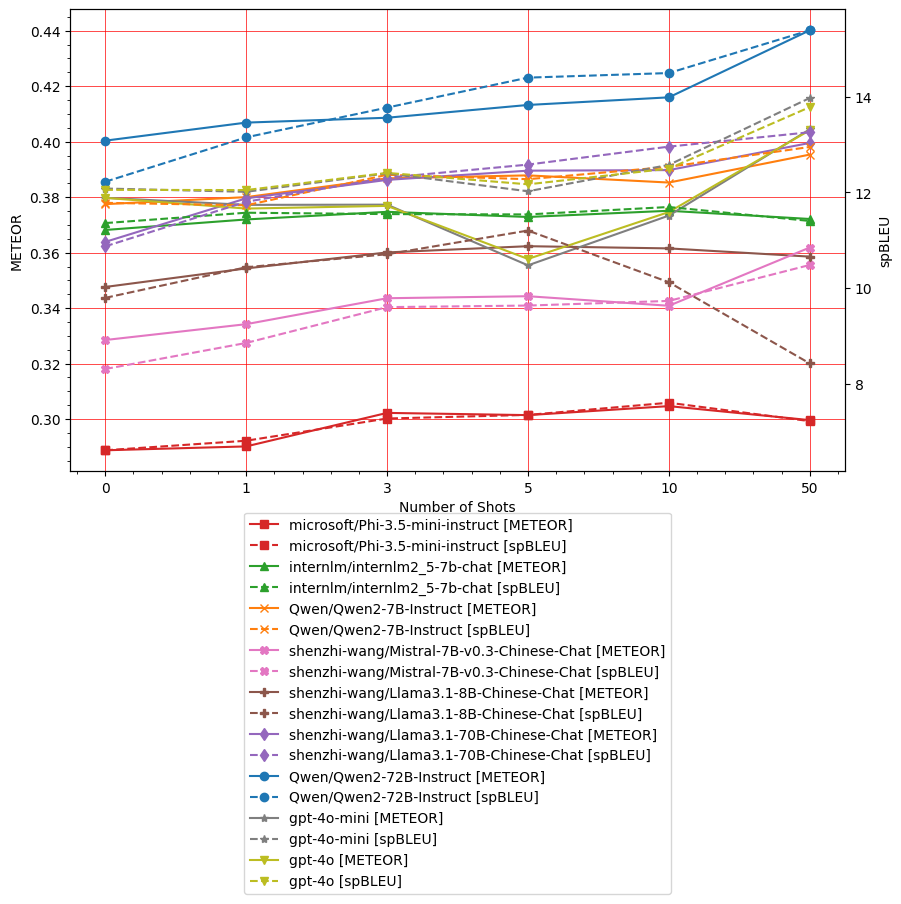

In [19]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "spbleu"],
    ["METEOR", "spBLEU"],
)

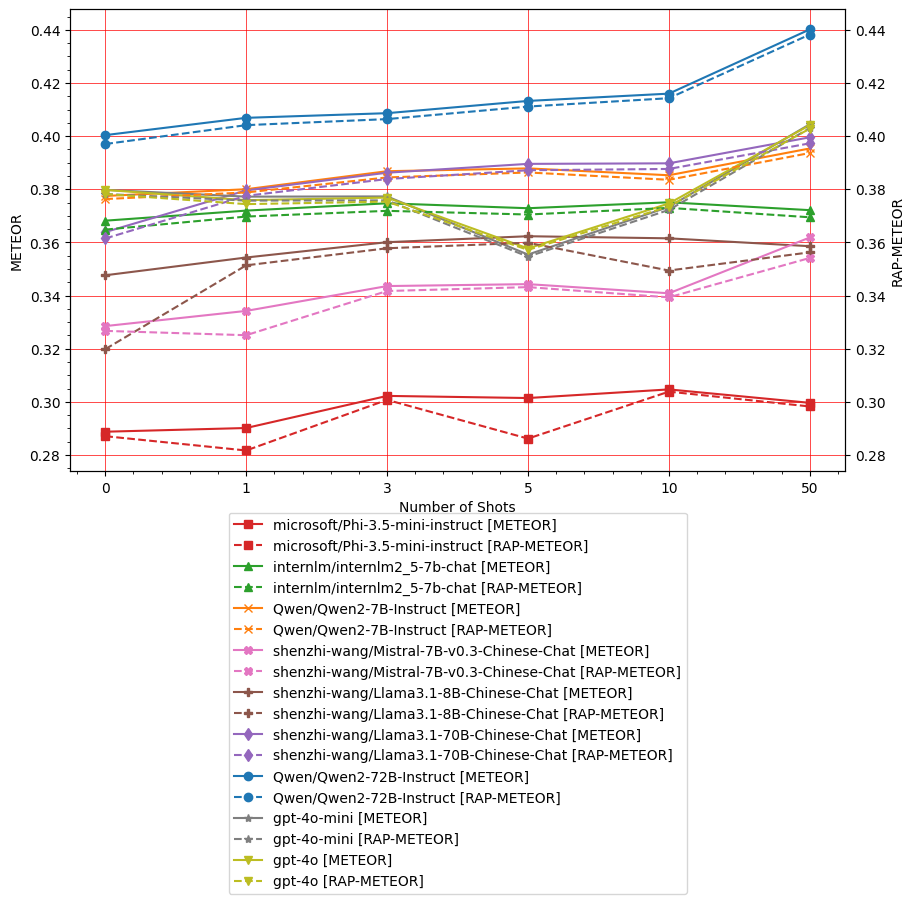

In [20]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

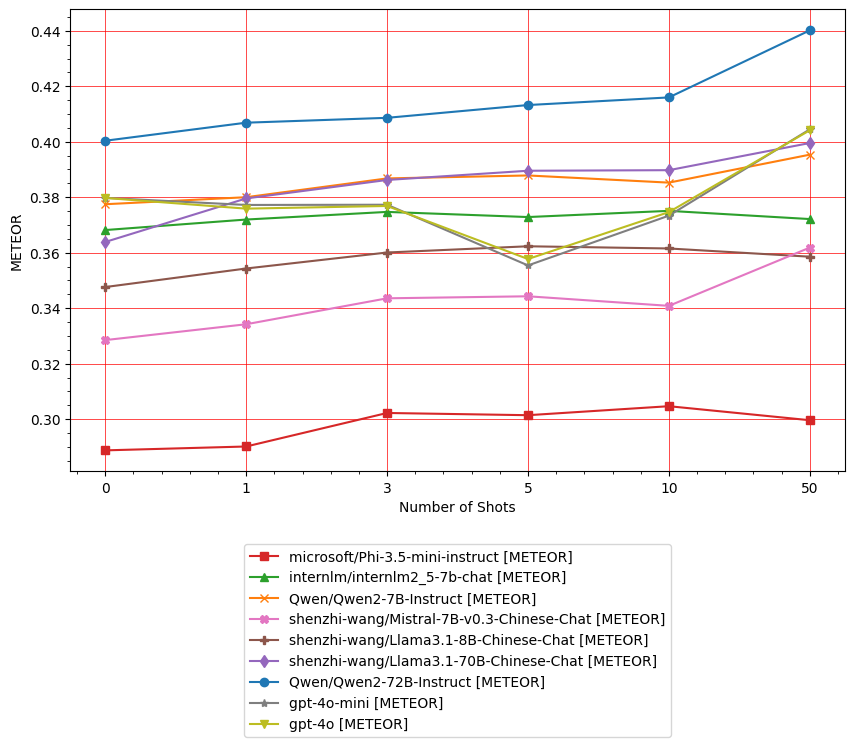

In [21]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

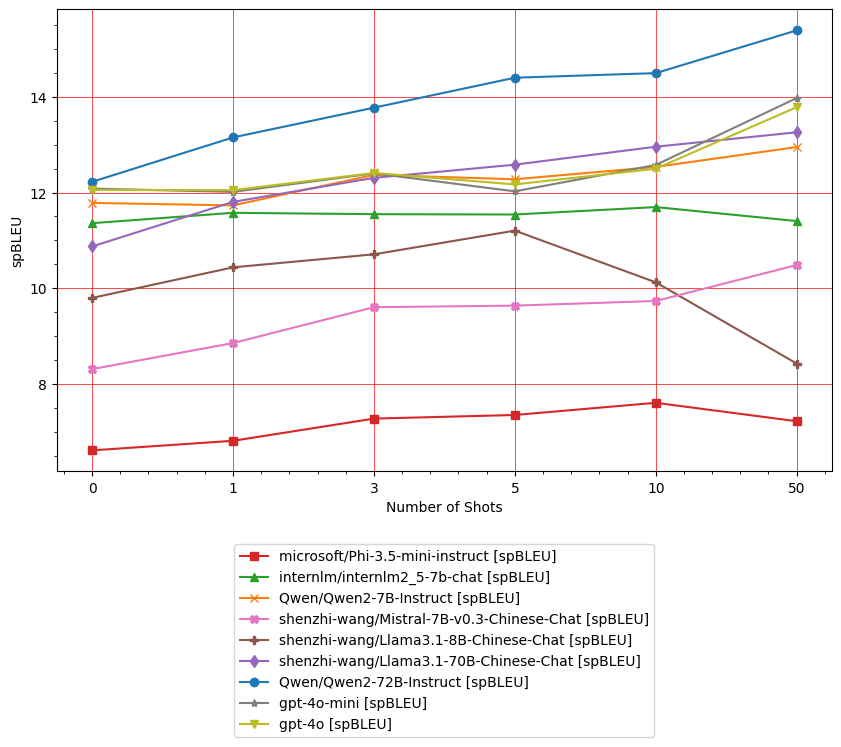

In [22]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["spbleu"],
    ["spBLEU"],
)

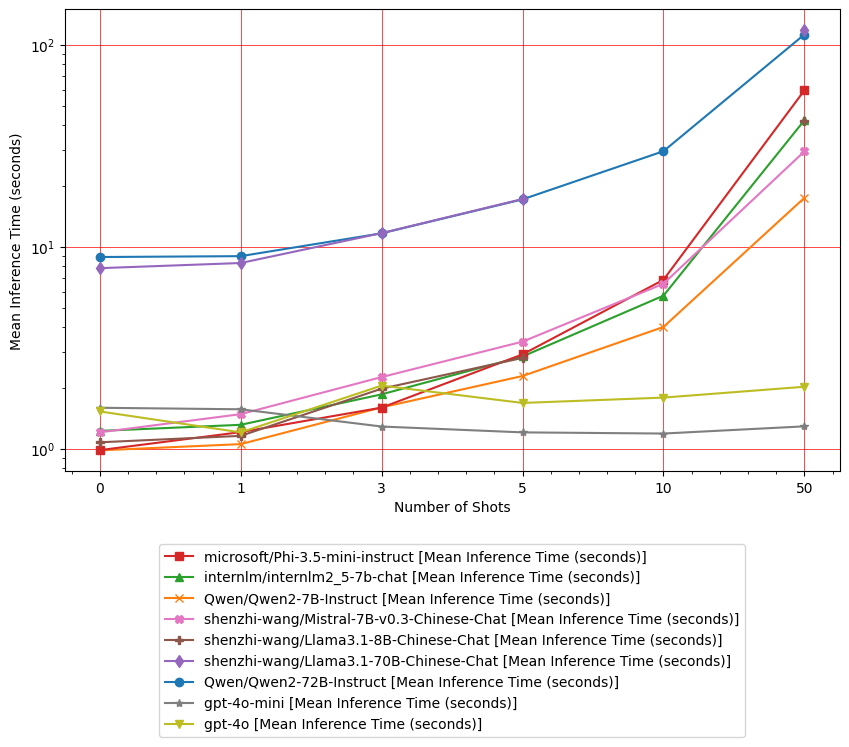

In [23]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    [True]
)

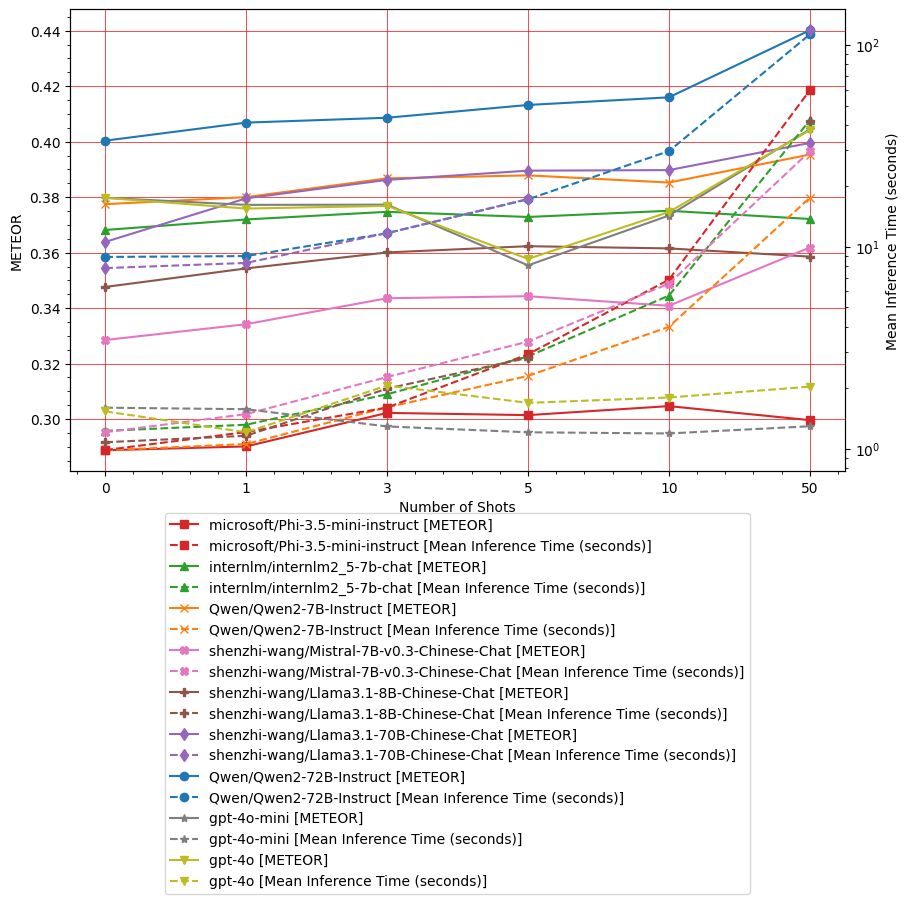

In [24]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    [False, True]
)

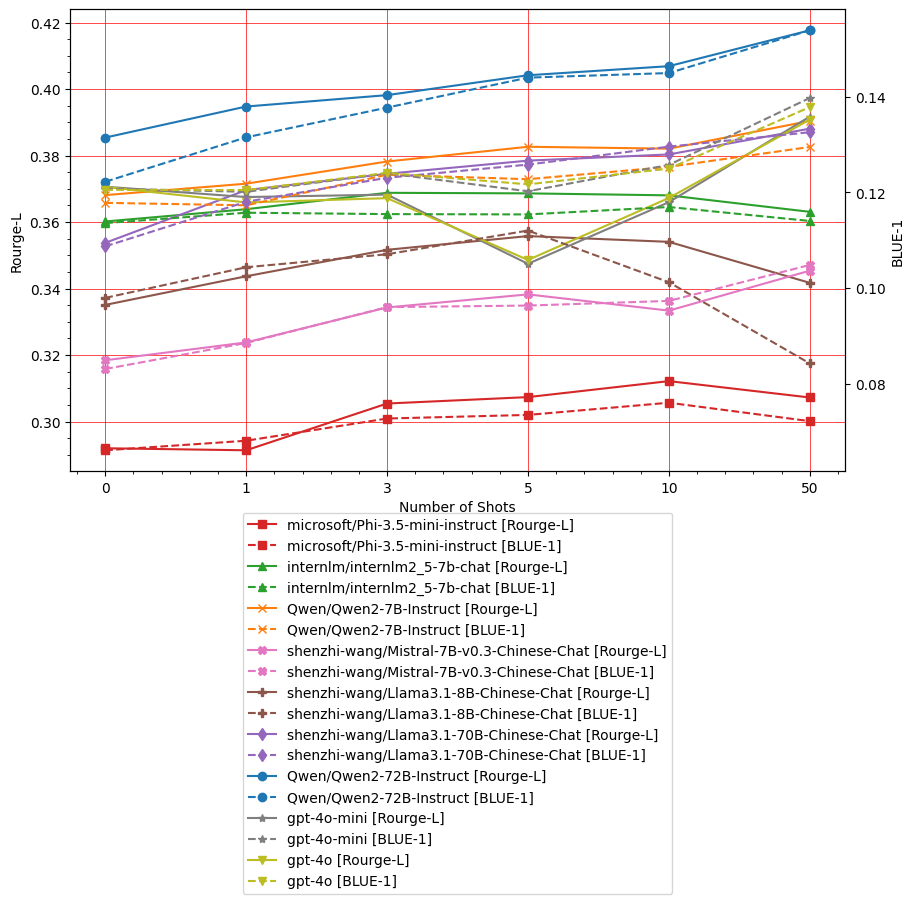

In [25]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

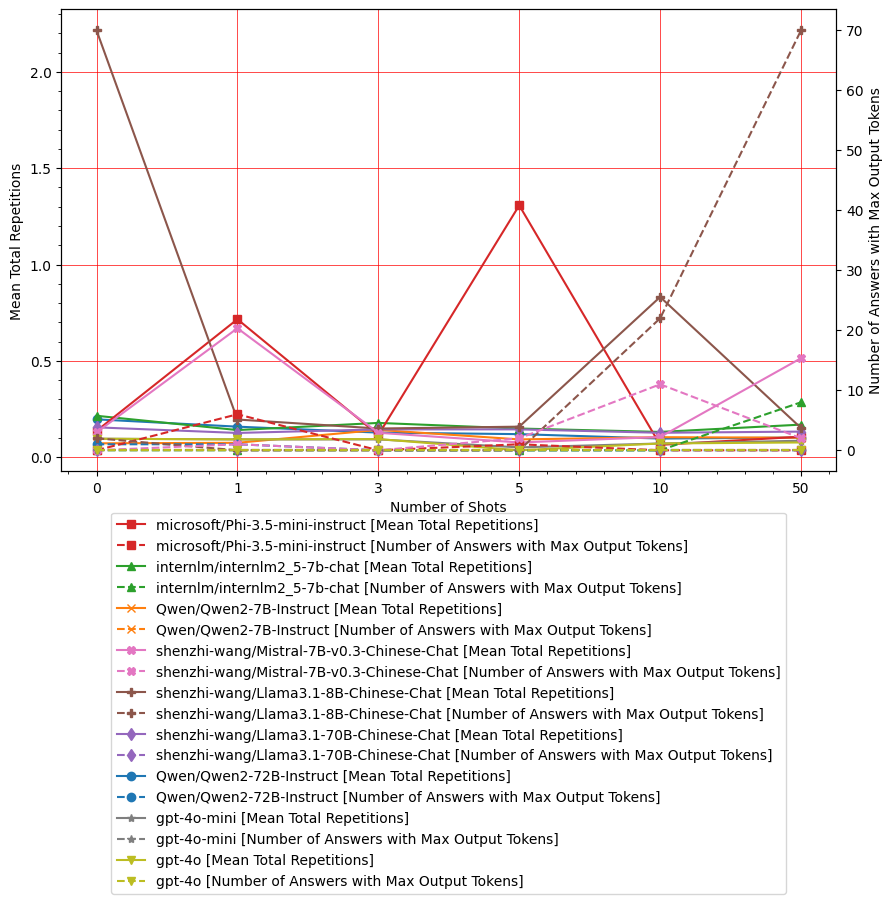

In [26]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

In [27]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/shots-00
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/shots-00

*** Found 1 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/shots-00
--------------------------------------------------
chinese: 话都说得有些不搭调，可也是借酒吐真言，放了平时则是难出口的。
--------------------------------------------------
english: Her words were inappropriate to the occasion; obviously, alcohol was bringing out some hidden truths.
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/shots-00: Though his words were somewhat incoherent, he was speaking the truth by借助the aid of alcohol, which would be hard to utter under normal circumstances. 

Note: "借酒吐真言" is a Chinese idiom that means "to speak the truth with the aid of alcohol". However, since the instruction is not to provide additional sentences, I have included the translation of the idiom in brackets. If you prefer not to have this, the sentence would be: 

Though his words were s

In [28]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [29]:
metrics_df.describe()

shots     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  54.000000  54.000000  54.000000  54.000000  54.000000       54.0   
mean   11.500000   0.367822  11.301196   0.113012   0.359820        0.0   
std    17.683539   0.032843   2.067764   0.020678   0.029054        0.0   
min     0.000000   0.288749   6.616686   0.066167   0.291354        0.0   
25%     1.000000   0.355995  10.203512   0.102035   0.344116        0.0   
50%     4.000000   0.374677  11.794467   0.117945   0.367216        0.0   
75%    10.000000   0.386643  12.475866   0.124759   0.378411        0.0   
max    50.000000   0.440154  15.386349   0.153863   0.417682        0.0   

       repetition_score  total_repetitions        rap  \
count         54.000000          54.000000  54.000000   
mean           0.220245           0.220245   0.364662   
std            0.354235           0.354235   0.034266   
min            0.035305           0.035305   0.281685   
25%            0.092233           0.092233   0.352055   
50%            0.126214           0.126214   0.372605   
75%            0.153575           0.153575   0.384291   
max            2.216240           2.216240   0.438232   

       translation_completeness  num_max_output_tokens   eval_time  
count                 54.000000              54.000000   52.000000  
mean                   0.969419               2.351852   11.914743  
std                    0.027456              10.021030   24.148014  
min                    0.879082               0.000000    0.980583  
25%                    0.962489               0.000000    1.306708  
50%                    0.980583               0.000000    2.157105  
75%                    0.985878               0.000000    8.917034  
max                    0.996470              70.000000  117.984113